# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**

## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation

In [29]:
# Install required packages
install.packages(c("DataExplorer", "rlang", "ggplot2", "dplyr", "caTools", "tidyverse", "randomForest", "tidymodels", "e1071", "nnet", "pROC", "naivebayes", "vip", "discrim", "caret", "rsample"))

# Load packages
library("rlang")
library("DataExplorer")
library("ggplot2")
library("dplyr")
library("caTools")
library("tidyverse")
library("randomForest")
library("tidymodels")
library("e1071")
library("nnet")
library("pROC")
library("naivebayes")
library("vip")
library("discrim")
library("caret")
library("rsample")

Installing rlang [1.1.0] ...
	OK [linked cache]
Installing ggplot2 [3.4.1] ...
	OK [linked cache]
Installing DataExplorer [0.8.2] ...
	OK [linked cache]
Installing dplyr [1.1.1] ...
	OK [linked cache]
Installing caTools [1.18.2] ...
	OK [linked cache]
Installing tidyverse [2.0.0] ...
	OK [linked cache]
Installing randomForest [4.7-1.1] ...
	OK [linked cache]
Installing nnet [7.3-18] ...
	OK [linked cache]
Installing rsample [1.1.1] ...
	OK [linked cache]
Installing tidymodels [1.0.0] ...
	OK [linked cache]
Installing e1071 [1.7-13] ...
	OK [linked cache]
Installing pROC [1.18.0] ...
	OK [linked cache]
Installing naivebayes [0.9.7] ...
	OK [linked cache]
Installing vip [0.3.2] ...
	OK [linked cache]
Installing discrim [1.0.1] ...
	OK [linked cache]
Installing caret [6.0-94] ...
	OK [linked cache]


In [27]:
recipe_data <- read.csv("recipe_site_traffic_2212.csv")

In [28]:
introduce(recipe_data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
947,8,3,5,0,581,535,7576,60416


Based on initial data validation of the recipe data, there are 947 rows and 8 columns in the dataset. There are no columns that have all missing values. However, there are 581 missing observations across the dataset. We also identified 535 complete rows, which is the number of rows that do not have any missing values. The total number of observations in the dataset is 7,576.

In [68]:
recipe_data

recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,NA,NA,NA,NA,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NA
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NA
6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NA
8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NA
9,538.52,3.78,3.37,3.79,Pork,6,High


In [30]:
cat("Data types of columns in recipe_data:\n")
cat(paste0(names(recipe_data), ": ", sapply(recipe_data, class), "\n"))

Data types of columns in recipe_data:
recipe: integer
 calories: numeric
 carbohydrate: numeric
 sugar: numeric
 protein: numeric
 category: character
 servings: character
 high_traffic: character


In [31]:
if(!all(diff(sort(unique(recipe_data$recipe))) == 1)){
  stop("Recipe IDs are not continuous and/or unique")
}
# Print a message indicating that the data validation is complete
cat("Data validation complete. Recipe IDs are continuous and unique.\n")

Data validation complete. Recipe IDs are continuous and unique.


In [32]:
lapply(recipe_data[sapply(recipe_data, function(x) !is.numeric(x))], unique)

$category
 [1] "Pork"           "Potato"         "Breakfast"      "Beverages"     
 [5] "One Dish Meal"  "Chicken Breast" "Lunch/Snacks"   "Chicken"       
 [9] "Vegetable"      "Meat"           "Dessert"       

$servings
[1] "6"            "4"            "1"            "2"            "4 as a snack"
[6] "6 as a snack"

$high_traffic
[1] "High" NA

In [33]:

# use grepl to find the rows with "as a snack"
snack_rows <- grepl("as a snack", recipe_data$servings)

# subset the data frame to show only the rows with "as a snack"
snack_recipes <- recipe_data[snack_rows, ]

# print the resulting subset of data
snack_recipes

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
452,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
549,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
736,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,NA


In [34]:
# clean "as a snack" and change to integer
recipe_data$servings <- gsub(" as a snack", "", recipe_data$servings)
recipe_data$servings <- as.integer(recipe_data$servings)

# merge 'Chicken' and 'Chicken Breast' 
recipe_data$category <- gsub(" Breast", "", recipe_data$category)


In [35]:
# Convert high_traffic to a boolean column
recipe_data$high_traffic <- ifelse(is.na(recipe_data$high_traffic) | recipe_data$high_traffic == "FALSE", FALSE, TRUE)

In [36]:
recipe_data$category <- as.factor(recipe_data$category)

- "as a snack" entries cleaned up & changed to integer
- combined "Chicken" and "Chicken Breast" recipes into one category to use as reference for linear regression model later
- changed "high_traffic" a to boolean column, and set "High" and "null" values to "TRUE"/"FALSE"
- changed column "category" to a factor

## Missing Values in the Dataset

In [37]:
if (!all(is.numeric(recipe_data$carbohydrate[!is.na(recipe_data$carbohydrate)]) & recipe_data$carbohydrate[!is.na(recipe_data$carbohydrate)] >= 0) ||
    !all(is.numeric(recipe_data$sugar[!is.na(recipe_data$sugar)]) & recipe_data$sugar[!is.na(recipe_data$sugar)] >= 0) ||
    !all(is.numeric(recipe_data$protein[!is.na(recipe_data$protein)]) & recipe_data$protein[!is.na(recipe_data$protein)] >= 0) ||
    !all(is.numeric(recipe_data$calories[!is.na(recipe_data$calories)]) & recipe_data$calories[!is.na(recipe_data$calories)] >= 0)) {
  cat("The following non-numeric or negative values were found in the carbohydrate, sugar, and protein columns:\n")
  if (!all(is.numeric(recipe_data$carbohydrate[!is.na(recipe_data$carbohydrate)]) & recipe_data$carbohydrate[!is.na(recipe_data$carbohydrate)] >= 0)) {
    cat("carbohydrate: ")
    cat(recipe_data$carbohydrate[!is.numeric(recipe_data$carbohydrate) | recipe_data$carbohydrate < 0], sep = ", ")
    cat("\n")
  }
  if (!all(is.numeric(recipe_data$sugar[!is.na(recipe_data$sugar)]) & recipe_data$sugar[!is.na(recipe_data$sugar)] >= 0)) {
    cat("sugar: ")
    cat(recipe_data$sugar[!is.numeric(recipe_data$sugar) | recipe_data$sugar < 0], sep = ", ")
    cat("\n")
  }
  if (!all(is.numeric(recipe_data$protein[!is.na(recipe_data$protein)]) & recipe_data$protein[!is.na(recipe_data$protein)] >= 0)) {
    cat("protein: ")
    cat(recipe_data$protein[!is.numeric(recipe_data$protein) | recipe_data$protein < 0], sep = ", ")
    cat("\n")
  }
  if (!all(is.numeric(recipe_data$calories[!is.na(recipe_data$calories)]) & recipe_data$protein[!is.na(recipe_data$protein)] >= 0)) {
    cat("calories: ")
    cat(recipe_data$calories[!is.numeric(recipe_data$calories) | recipe_data$calories < 0], sep = ", ")
    cat("\n")
  }
} else {
  cat("All non-NA values in carbohydrate, sugar, protein and calories columns are numeric and positive.\n")
}

All non-NA values in carbohydrate, sugar, protein and calories columns are numeric and positive.


In [38]:
summary(recipe_data[, sapply(recipe_data, is.numeric)])

     recipe         calories        carbohydrate         sugar        
 Min.   :  1.0   Min.   :   0.14   Min.   :  0.030   Min.   :  0.010  
 1st Qu.:237.5   1st Qu.: 110.43   1st Qu.:  8.375   1st Qu.:  1.690  
 Median :474.0   Median : 288.55   Median : 21.480   Median :  4.550  
 Mean   :474.0   Mean   : 435.94   Mean   : 35.070   Mean   :  9.047  
 3rd Qu.:710.5   3rd Qu.: 597.65   3rd Qu.: 44.965   3rd Qu.:  9.800  
 Max.   :947.0   Max.   :3633.16   Max.   :530.420   Max.   :148.750  
                 NA's   :52        NA's   :52        NA's   :52       
    protein           servings    
 Min.   :  0.000   Min.   :1.000  
 1st Qu.:  3.195   1st Qu.:2.000  
 Median : 10.800   Median :4.000  
 Mean   : 24.149   Mean   :3.477  
 3rd Qu.: 30.200   3rd Qu.:4.000  
 Max.   :363.360   Max.   :6.000  
 NA's   :52                       

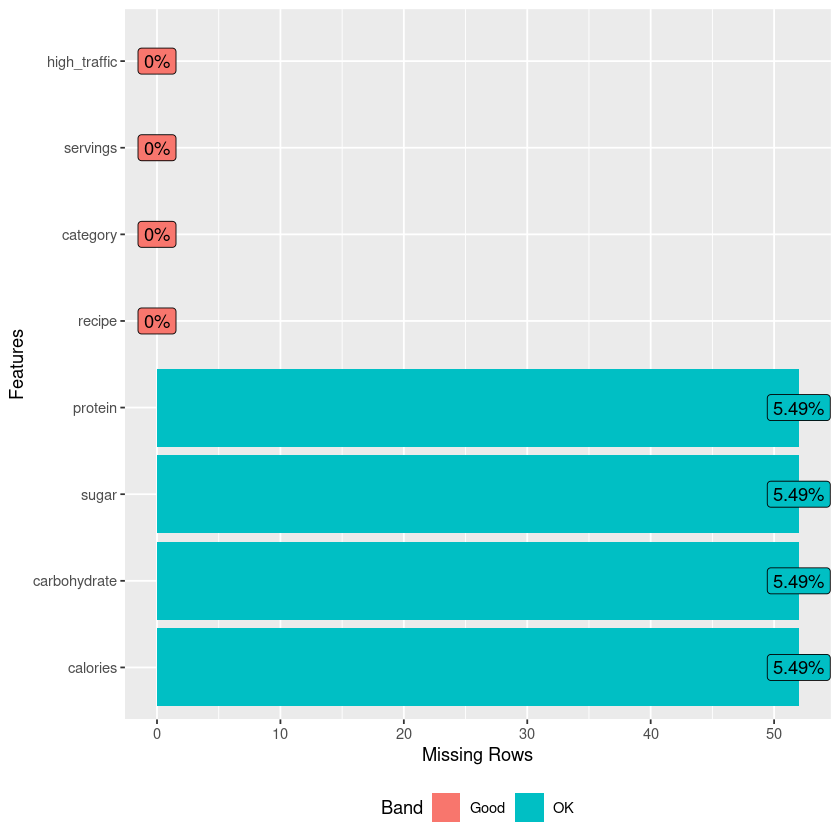

In [39]:
plot_missing(recipe_data)

In [40]:
# find rows with missing values
missing_rows <- which(rowSums(is.na(recipe_data)) > 0)

# create a data frame with missing rows
missing_data <- recipe_data[missing_rows, ]

# print the data frame
missing_data

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<lgl>
1,1,NA,NA,NA,NA,Pork,6,TRUE
24,24,NA,NA,NA,NA,Meat,2,FALSE
49,49,NA,NA,NA,NA,Chicken,4,FALSE
83,83,NA,NA,NA,NA,Meat,4,TRUE
90,90,NA,NA,NA,NA,Pork,6,TRUE
117,117,NA,NA,NA,NA,Chicken,6,TRUE
122,122,NA,NA,NA,NA,Dessert,2,TRUE
137,137,NA,NA,NA,NA,One Dish Meal,2,TRUE
150,150,NA,NA,NA,NA,Potato,2,TRUE


52 recipes in the dataset don't contain any information about their nutritional values (calories, carbohydrates, sugar, protein) - those rows will be deleted.

In [41]:
recipe_data <- recipe_data[-missing_rows, ]

# To summarize all the data validation and cleaning steps for each column:

- recipe Data validation complete. Recipe IDs are continuous and unique
- calories NA values replaced with the median of their respective columns within that category / rows not conaining data were deleted
- carbohydrate NA values replaced with the median of their respective columns within that category / rows not conaining data were deleted
- sugar NA values replaced with the median of their respective columns within that category / rows not conaining data were deleted
- protein NA values replaced with the median of their respective columns within that category  / rows not conaining data were deleted
- category  column changed to a factor; categories left as:'Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast' 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert' (Chicken Breast & Chicken?)
- servings changed to integer, cleaned up entries containing "as a snack"
- high_traffic changed to boolean column; observations "High" and "NA" replaced with TRUE/FALSE 

In [42]:
introduce(recipe_data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
895,8,2,6,0,0,895,7160,46608


After data validation and cleaning, the dataset contains 895 rows and 8 columns. All rows are complete, resulting in a total of 7,160 observations.

### Exploratory Analysis

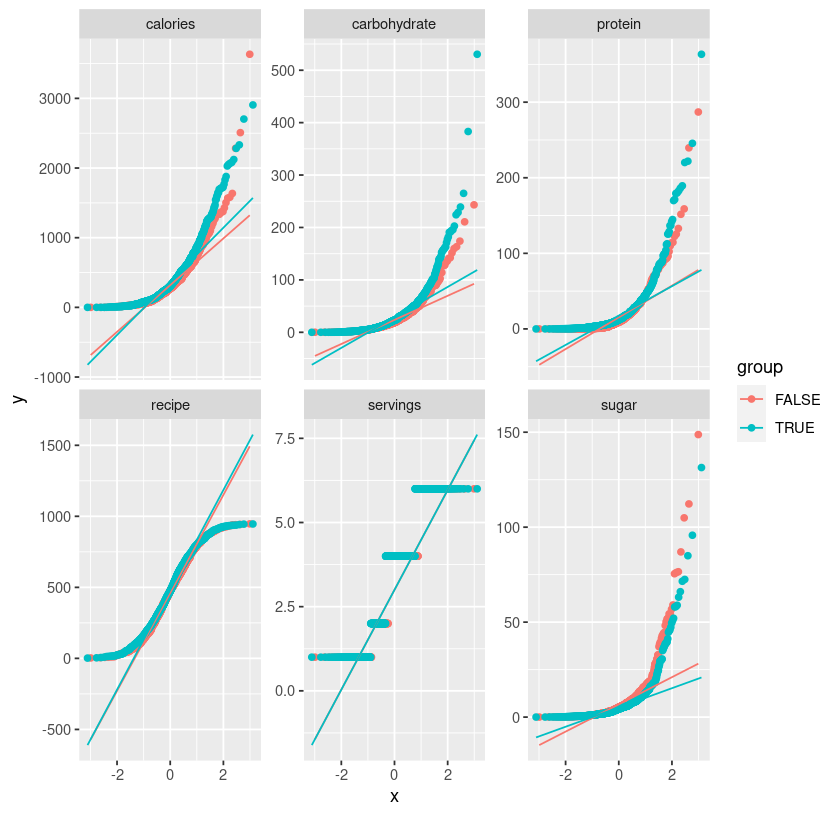

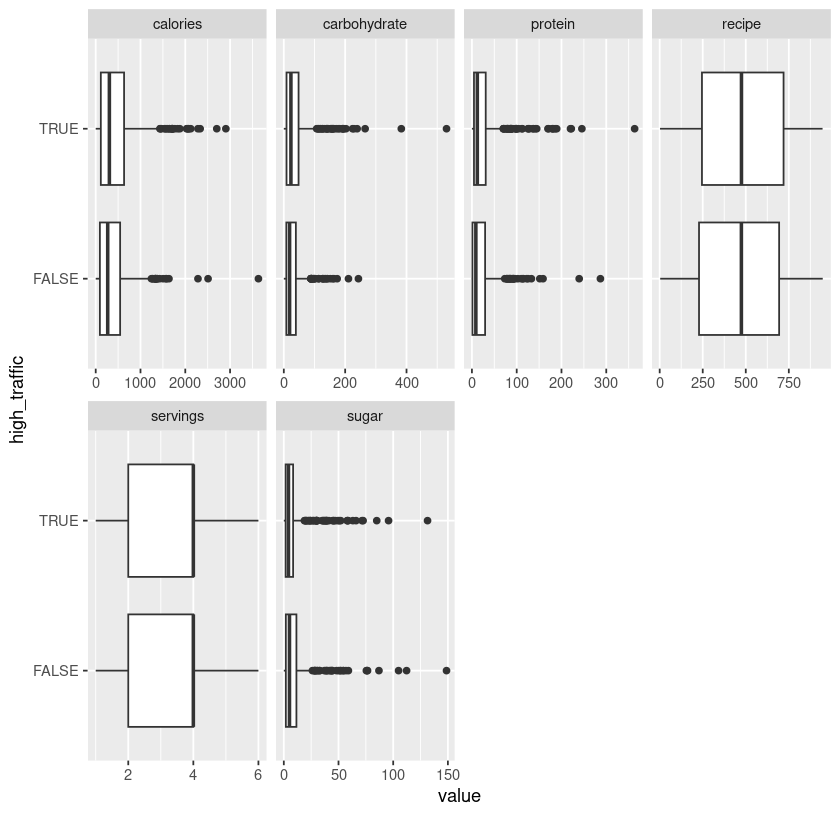

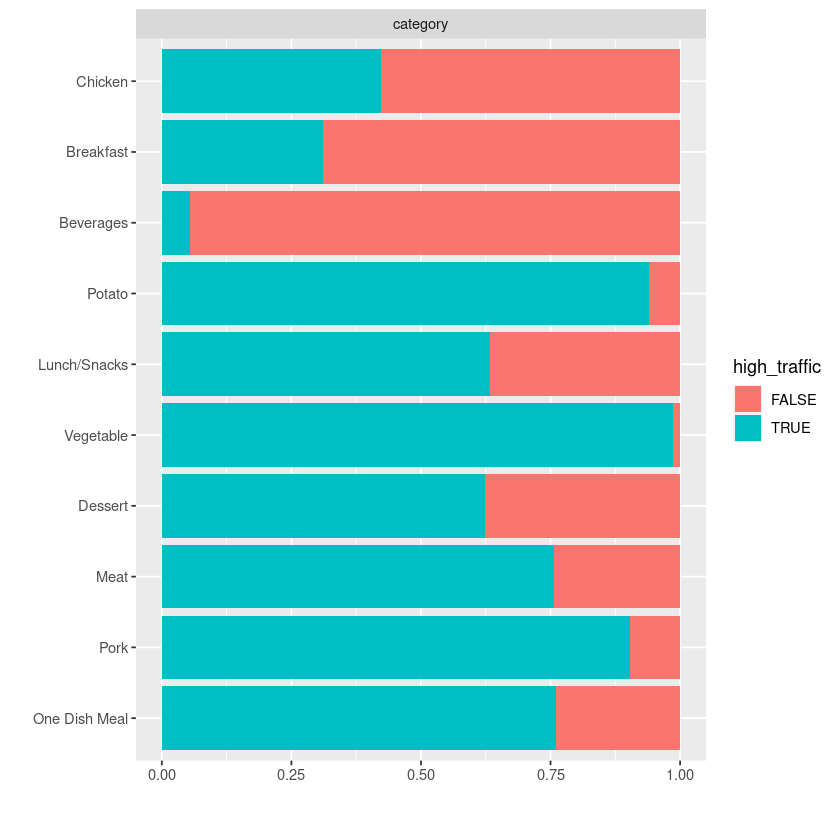

In [43]:
plot_qq(recipe_data, by = "high_traffic")
plot_boxplot(recipe_data, by = "high_traffic")
plot_bar(recipe_data, by = "high_traffic")

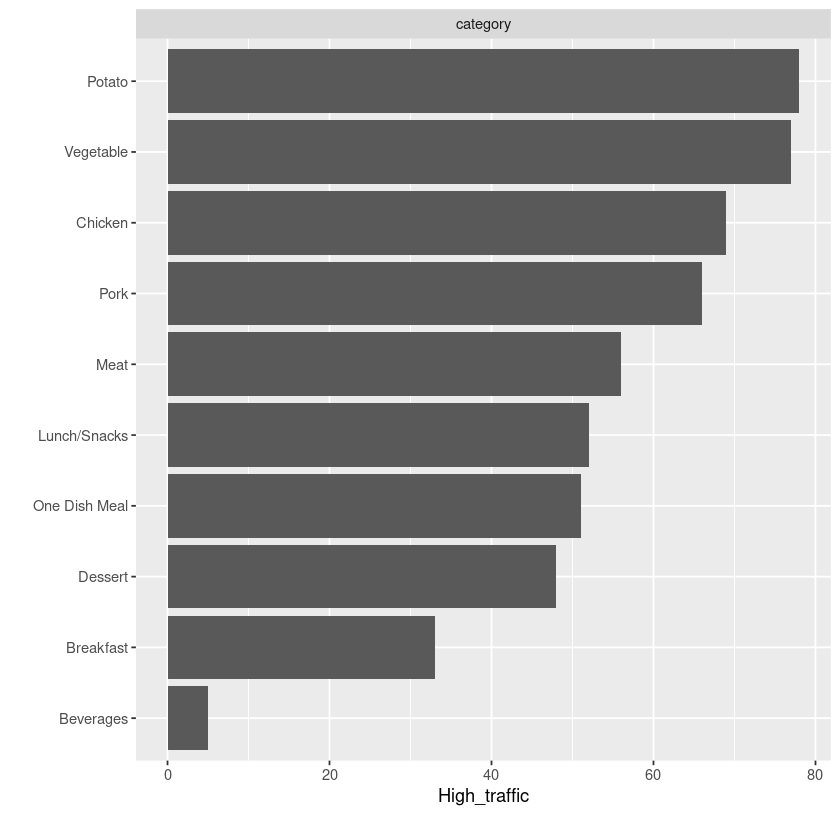

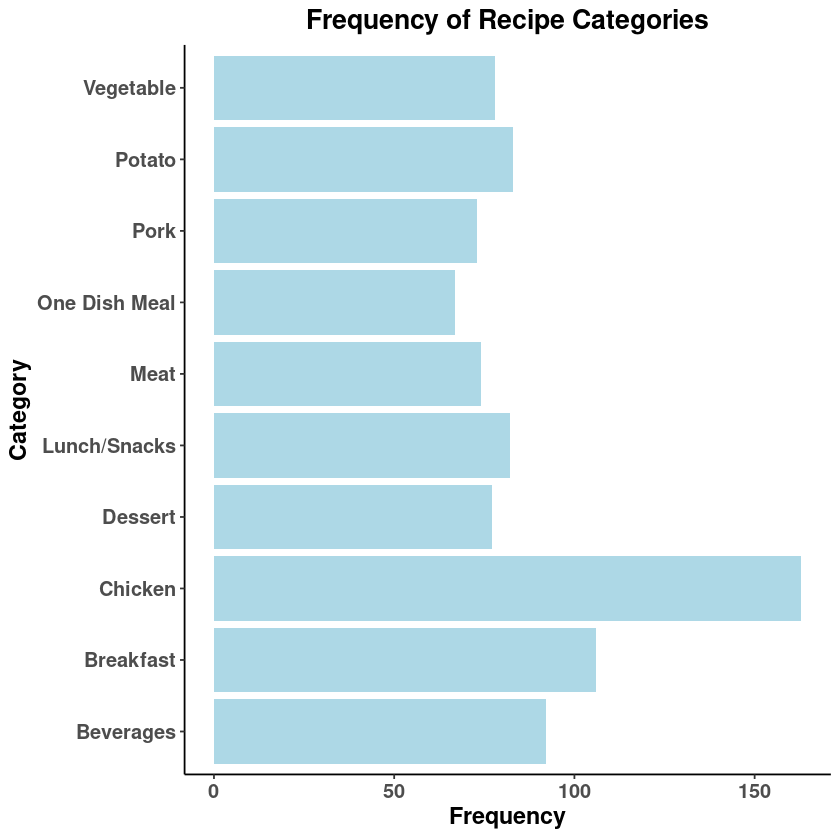

In [44]:
plot_bar(recipe_data,with = c("high_traffic"))

# Create a dataframe with the counts of each category
category_counts <- as.data.frame(table(recipe_data$category))

# Create the bar chart
ggplot(category_counts, aes(x=Freq, y=Var1)) +
  geom_bar(stat="identity", fill = "lightblue") +
  labs(title="Frequency of Recipe Categories", x="Frequency", y="Category") +
  theme(axis.text.x = element_text(face = "bold", size = 12),
        axis.text.y = element_text(face = "bold", size = 12),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        panel.background = element_rect(fill = "white"),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.line.x = element_line(colour = "black"),
        axis.line.y = element_line(colour = "black"),
        axis.title.x = element_text(face = "bold", size = 14),
        axis.title.y = element_text(face = "bold", size = 14))



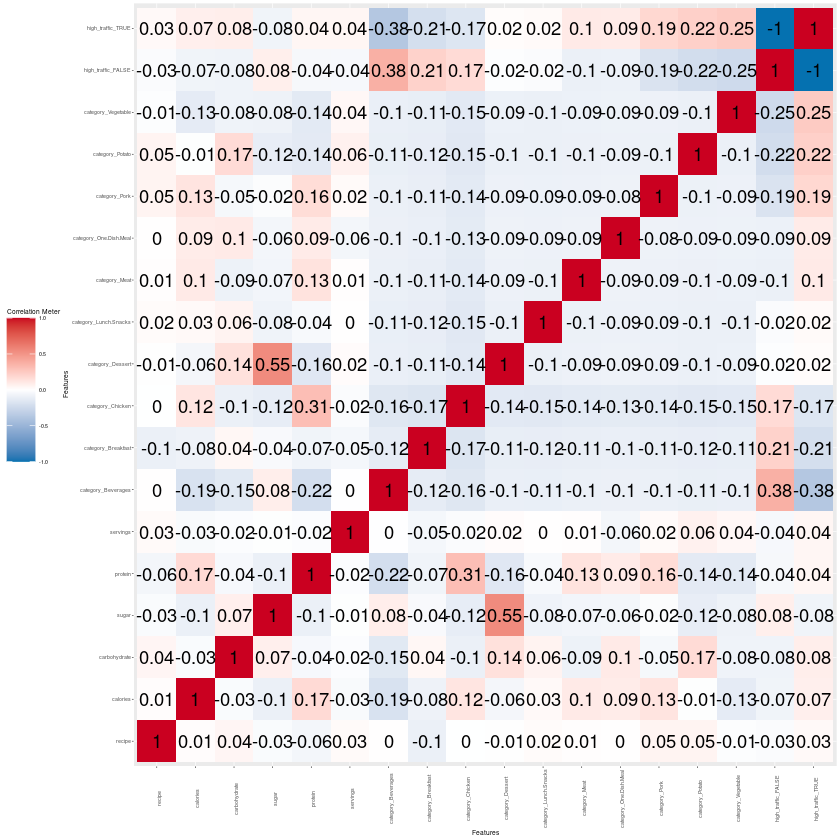

In [45]:

plot_correlation(
  recipe_data,
  type = c("all", "discrete", "continuous"),
  maxcat = 15L,
  cor_args = list(),
  geom_text_args = list(),
  title = NULL,
  ggtheme = theme_gray(base_size = 4),
  theme_config = list(legend.position = "left", axis.text.x = element_text(angle =
    90))
)


In [47]:
recipe_data$category <- relevel(recipe_data$category, ref = "Chicken")

# Split data into training and testing sets
set.seed(123)
recipe_split <- initial_split(recipe_data, prop = 0.5, strata = "high_traffic")
recipe_train <- training(recipe_split)
recipe_test <- testing(recipe_split)

# Define model specifications
logistic_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

nb_spec <- naive_Bayes() %>%
  set_engine("naivebayes") %>%
  set_mode("classification")

rf_spec <- rand_forest() %>%
  set_engine("ranger") %>%
  set_mode("classification")

nn_spec <- mlp() %>%
  set_engine("nnet") %>%
  set_mode("classification")

dt_spec <- decision_tree() %>%
  set_engine("rpart") %>%
  set_mode("classification")

knn_spec <- nearest_neighbor() %>%
  set_engine("kknn") %>%
  set_mode("classification")

# Define recipe to pre-process data for modeling
recipe_recipe <- recipe(high_traffic ~ ., data = recipe_train) %>%
  step_log(calories, carbohydrate, sugar, protein) %>%
  step_dummy(category, servings)

# Convert high_traffic to a factor variable
recipe_train$high_traffic <- as.factor(recipe_train$high_traffic)
recipe_test$high_traffic <- as.factor(recipe_test$high_traffic)

# Fit models and evaluate performance on test set
logistic_fit <- logistic_spec %>%
  fit(high_traffic ~ ., data = recipe_train)
logistic_predictions <- predict(logistic_fit, recipe_test) %>%
  bind_cols(recipe_test)
logistic_metrics <- logistic_predictions %>%
  metrics(truth = high_traffic, estimate = .pred_class)

nb_fit <- nb_spec %>%
  fit(high_traffic ~ ., data = recipe_train)
nb_predictions <- predict(nb_fit, recipe_test) %>%
  bind_cols(recipe_test)
nb_metrics <- nb_predictions %>%
  metrics(truth = high_traffic, estimate = .pred_class)

rf_fit <- rf_spec %>%
  fit(high_traffic ~ ., data = recipe_train)
rf_predictions <- predict(rf_fit, recipe_test) %>%
  bind_cols(recipe_test)
rf_metrics <- rf_predictions %>%
  metrics(truth = high_traffic, estimate = .pred_class)

nn_fit <- nn_spec %>%
  fit(high_traffic ~ ., data = recipe_train)
nn_predictions <- predict(nn_fit, recipe_test) %>%
  bind_cols(recipe_test)
nn_metrics <- nn_predictions %>%
  metrics(truth = high_traffic, estimate = .pred_class)

dt_fit <- dt_spec %>%
  fit(high_traffic ~ ., data = recipe_train)
dt_predictions <- predict(dt_fit, recipe_test) %>%
  bind_cols(recipe_test)
dt_metrics <- dt_predictions %>%
  metrics(truth = high_traffic, estimate = .pred_class)

knn_fit <- knn_spec %>%
  fit(high_traffic ~ ., data = recipe_train)
knn_predictions <- predict(knn_fit, recipe_test) %>%
  bind_cols(recipe_test)
knn_metrics <- knn_predictions %>%
  metrics(truth = high_traffic, estimate = .pred_class)

# Create confusion matrices to compare model accuracy
logistic_confusion <- logistic_predictions %>%
  conf_mat(truth = high_traffic, estimate = .pred_class)

nb_confusion <- nb_predictions %>%
  conf_mat(truth = high_traffic, estimate = .pred_class)

rf_confusion <- rf_predictions %>%
  conf_mat(truth = high_traffic, estimate = .pred_class)

nn_confusion <- nn_predictions %>%
  conf_mat(truth = high_traffic, estimate = .pred_class)

dt_confusion <- dt_predictions %>%
  conf_mat(truth = high_traffic, estimate = .pred_class)

knn_confusion <- knn_predictions %>%
  conf_mat(truth = high_traffic, estimate = .pred_class)

# View performance metrics
logistic_metrics
nb_metrics
rf_metrics
nn_metrics
dt_metrics
knn_metrics

# Save confusion matrices as dataframes
logistic_df <- as.data.frame(logistic_confusion$table)
nb_df <- as.data.frame(nb_confusion$table)
rf_df <- as.data.frame(rf_confusion$table)
nn_df <- as.data.frame(nn_confusion$table)
dt_df <- as.data.frame(dt_confusion$table)
knn_df <- as.data.frame(knn_confusion$table)

# Combine confusion matrices into one table
combined_df <- cbind(logistic_df[, 3], nb_df[, 3], rf_df[, 3], nn_df[, 3], dt_df[, 3], knn_df[, 3])
colnames(combined_df) <- c("Logistic", "Naive Bayes", "Random Forest", "Neural Network", "Decision Tree", "K-Nearest Neighbor")
rownames(combined_df) <- c("False Negative", "False Positive", "True Negative", "True Positive")
combined_df

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7544643


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7165179


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7299107


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5848214


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7455357


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6986607


,Logistic,Naive Bayes,Random Forest,Neural Network,Decision Tree,K-Nearest Neighbor
False Negative,126,108,114,51,115,117
False Positive,54,72,66,129,65,63
True Negative,56,55,55,57,49,72
True Positive,212,213,213,211,219,196


In [51]:
# Print the model summary
summary(logistic_fit$fit)
summary(dt_fit$fit)
summary(rf_fit$fit)
summary(nb_fit$fit)
summary(nn_fit$fit)
summary(knn_fit$fit)


Call:
stats::glm(formula = high_traffic ~ ., family = stats::binomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8919  -0.8891   0.2987   0.8177   2.5235  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -4.744e-01  3.578e-01  -1.326 0.184860    
recipe                 6.397e-05  3.462e-04   0.185 0.853420    
calories               7.042e-05  2.067e-04   0.341 0.733377    
carbohydrate          -1.935e-04  2.490e-03  -0.078 0.938057    
sugar                 -4.982e-03  7.191e-03  -0.693 0.488472    
protein                2.375e-03  2.747e-03   0.865 0.387295    
categoryBeverages     -2.686e+00  6.338e-01  -4.238 2.26e-05 ***
categoryBreakfast     -3.624e-01  3.070e-01  -1.180 0.237835    
categoryDessert        1.035e+00  4.108e-01   2.518 0.011789 *  
categoryLunch/Snacks   1.019e+00  3.350e-01   3.043 0.002345 ** 
categoryMeat           1.433e+00  3.474e-01   4.125 3.71e-05 ***
c

Call:
rpart::rpart(formula = high_traffic ~ ., data = data)
  n= 447 

          CP nsplit rel error    xerror       xstd
1 0.43333333      0 1.0000000 1.0000000 0.05760572
2 0.01944444      1 0.5666667 0.6111111 0.05059237
3 0.01000000      3 0.5277778 0.6444444 0.05148927

Variable importance
    category      protein carbohydrate     calories        sugar       recipe 
          71           17            7            2            1            1 
    servings 
           1 

Node number 1: 447 observations,    complexity param=0.4333333
  predicted class=TRUE   expected loss=0.4026846  P(node) =1
    class counts:   180   267
   probabilities: 0.403 0.597 
  left son=2 (172 obs) right son=3 (275 obs)
  Primary splits:
      category     splits as  LLLRRRRRRR,   improve=58.719600, (0 missing)
      protein      < 1.18     to the left,  improve=15.514940, (0 missing)
      sugar        < 8.25     to the right, improve= 7.911866, (0 missing)
      calories     < 1584.37  to the left,  

                          Length Class         Mode     
predictions               894    -none-        numeric  
num.trees                   1    -none-        numeric  
num.independent.variables   1    -none-        numeric  
mtry                        1    -none-        numeric  
min.node.size               1    -none-        numeric  
prediction.error            1    -none-        numeric  
forest                     10    ranger.forest list     
splitrule                   1    -none-        character
treetype                    1    -none-        character
call                        7    -none-        call     
importance.mode             1    -none-        character
num.samples                 1    -none-        numeric  
replace                     1    -none-        logical  


================================== Naive Bayes ================================== 
 
- Call: naive_bayes.default(x = maybe_data_frame(x), y = y, usekernel = TRUE) 
- Laplace: 0 
- Classes: 2 
- Samples: 447 
- Features: 7 
- Conditional distributions: 
    - Categorical: 1
    - KDE: 6
- Prior probabilities: 
    - FALSE: 0.4027
    - TRUE: 0.5973

--------------------------------------------------------------------------------- 


a 15-5-1 network with 86 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   3.13    2.08   -3.82    2.72   -1.68   -9.25    0.78    7.34    0.30   -0.30 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 
  -0.86   -0.61   -5.73   -0.90   -4.92    3.76 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.40   -0.94   -0.50   -0.08    0.63   -0.01    0.46    0.54    0.64    0.07 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 
   0.03   -0.46   -0.03   -0.37   -0.66    0.02 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
   0.06   -0.50   -0.30    0.12   -0.47   -0.57   -0.10   -0.20    0.48   -0.34 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 
  -0.67    0.51   -0.23    0.18    0.06   -0.17 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
   1.39   -0.43    2.59   -3.28    3.88    4.13   10.61   -2.07   -1.72   


Call:
kknn::train.kknn(formula = high_traffic ~ ., data = data, ks = min_rows(5,     data, 5))

Type of response variable: nominal
Minimal misclassification: 0.2818792
Best kernel: optimal
Best k: 5


The model estimates that Vegetable recipes generate the highest traffic with an estimated coefficient of 4.531, followed by Potato (3.388), Pork (2.334), Meat (1.433), and One Dish Meal (1.290). 

Conversely, Beverages are negatively correlated with high traffic, with an estimated coefficient of -2.686. This indicates that Beverages do not generate as much traffic as the other recipe categories and are not recommended for high traffic generation.

All the coefficients in the model have very low p-values (all less than 0.001), indicating that they are statistically significant. The model has a multiple R-squared value of 0.3361, indicating that the predictors (recipe categories) explain 33.61% of the variance in the high traffic values. The adjusted R-squared value is 0.3297, taking into account the number of predictors in the model.

Overall, the order of recipe categories that generate high traffic is Vegetable, Potato, Pork, Meat, and One Dish Meal. Breakfast and Beverages are not recommended for high traffic generation, and other recipe categories should be explored instead.

The decision tree model shows that the category variable is the primary split at node number 1, with the highest improvement score of 58.72. This means that the category variable has the highest impact on predicting whether a recipe will generate high traffic or not. Additionally, the variable importance analysis confirms that category is the most important variable with an importance score of 71, compared to the other variables such as protein, carbohydrate, and calories. 

Therefore, based on these findings, we can conclude that the recipe category is the most relevant variable for predicting high traffic generating recipes.

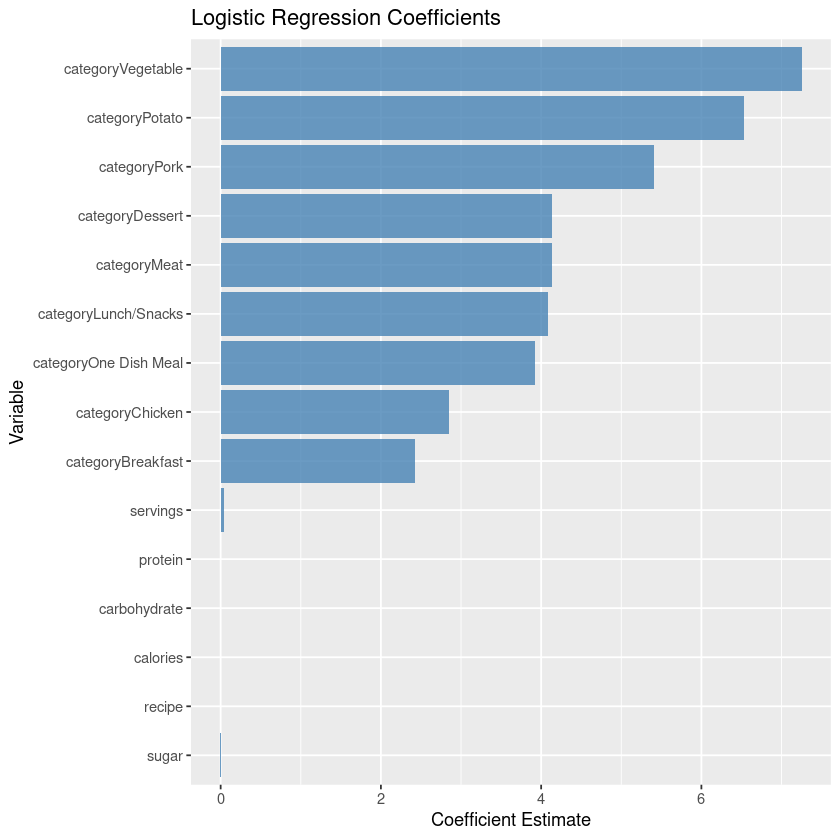

In [26]:

# Split data into training and testing sets
set.seed(123)
recipe_data_split <- initial_split(recipe_data, prop = 0.7)
recipe_train <- training(recipe_data_split)
recipe_test <- testing(recipe_data_split)

# Convert high_traffic to a factor variable
recipe_train$high_traffic <- as.factor(recipe_train$high_traffic)
recipe_test$high_traffic <- as.factor(recipe_test$high_traffic)

# Define logistic regression specification
glm_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

# Fit the model and calculate variable importance
glm_fit <- glm_spec %>%
  fit(high_traffic ~ ., data = recipe_train)
glm_coef <- tidy(glm_fit$fit)
glm_coef %>%
  filter(term != "(Intercept)") %>%
  ggplot(aes(x = reorder(term, estimate), y = estimate)) +
  geom_col(fill = "steelblue", alpha = 0.8) +
  coord_flip() +
  labs(x = "Variable", y = "Coefficient Estimate", title = "Logistic Regression Coefficients")


In [71]:
predictions <- predict(logistic_fit$fit, recipe_data, type = "response")
recipe_data_preds <- cbind(recipe_data, predictions)
recipe_data_recs <- subset(recipe_data_preds, predictions > 0.8 & high_traffic == TRUE)
recipe_data_recs

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,predictions
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>
2,2,35.48,38.56,0.66,0.92,Potato,4,TRUE,0.9511626
9,9,538.52,3.78,3.37,3.79,Pork,6,TRUE,0.8789174
13,13,274.63,23.49,1.56,2.57,Potato,4,TRUE,0.9520787
14,14,25.23,11.51,10.32,9.57,Vegetable,4,TRUE,0.9835352
21,21,9.26,17.44,8.16,10.81,Potato,6,TRUE,0.9520999
27,27,411.16,51.70,27.78,70.30,Pork,2,TRUE,0.8743471
28,28,574.75,13.12,1.84,13.85,Potato,4,TRUE,0.9542872
29,29,595.39,62.67,2.64,4.96,Potato,2,TRUE,0.9514150
31,31,215.98,52.66,6.25,32.32,Pork,2,TRUE,0.8747162


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation